## Analyzing Popular App Categories on Google Play Store

+ In this project, our goal is to figure out what types of apps tend to be popular on the Google Play Store. We work for a company that makes free apps and earn money through ads. By understanding which app categories are in high demand. We can help our developers create apps that attracts more users and generate more revenue. We'll analyze data from the Google play store to identity patterns andpreferences among users. This way, we can make smater decision about the kinds of apps we develope.

In [157]:
#Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
# hide all warnings runtime
import warnings
warnings.filterwarnings('ignore')

### Data Cleaning and Pre-processing

In [159]:
# Read the csv file 
df = pd.read_csv("googleplaystore.csv")

In [160]:
df.shape

(10841, 13)

In [161]:
# Explore the Data
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [162]:
# Print the columns name
print(f"The name of the columns are as follows: \
{df.columns}")

The name of the columns are as follows: Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [163]:
# Check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Observations

1. There are 10841 rows and 13 columns in the dataset
2. The columns are of different data types
3. There are some missing values in the dataset.
4. There are some columns which are of object data type but they should be of numeric data type

### Target Column: Category

In [164]:
# Check the Categories Count
df["Category"].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [165]:
# Check the incorrect Categories
df[df["Category"] == "1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


- After Check analyze there is a category is missing in the Category column.

In [166]:
# Extract the list
lst = df[df["Category"] == "1.9"].values
lst

array([['Life Made WI-Fi Touchscreen Photo Frame', '1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone', nan, 'February 11, 2018',
        '1.0.19', '4.0 and up', nan]], dtype=object)

In [167]:
# Find the category name and clean the list
clean_lst = ['Life Made WI-Fi Touchscreen Photo Frame', 'LIFESTYLE', '1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone', 'LIFESTYLE', 'February 11, 2018',
        '1.0.19', '4.0 and up']

In [168]:
# ubdate the row with the clean list
df[df["Category"] == "1.9"] = clean_lst

In [169]:
# Now Check the Categories Values
android_df = df["Category"].value_counts()
android_df

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               383
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

### Observation

- we can see the above there is no messy value remaining in the Targeted column

### Target Column: App

In [170]:
# Now Check the App Count
app_count = df['App'].value_counts()
app_count

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

-  we explore that the Google Play data enough, we'll find that some of the apps have more than one entry. For instance, the app 'Instagram' has 4 entries.

In [171]:
# Check duplicate apps
app_count[app_count > 1]

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
                                                    ..
Transenger – Ts Dating and Chat for Free             2
Random Video Chat                                    2
Clover Dating App                                    2
Docs To Go™ Free Office Suite                        2
English Dictionary - Offline                         2
Name: App, Length: 798, dtype: int64

- Show above there are 798 application duplicated in this record

In [172]:
# Check Instagram is in the duplicate record
"Instagram" in app_count[app_count > 1].index

True

In [173]:
# Check Instagram Duplicate values in the Record
df [df["App"] == "Instagram"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [174]:
# Check for duplicate rows based on the app column and marking as True
duplicated_app = df[df.duplicated(subset=['App'], keep= False)]
duplicated_app[duplicated_app['App'] == 'Instagram']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [175]:
# Check the num of duplicates apps
duplicated_app_num = duplicated_app['App'].nunique()
duplicated_app_num

798

In [176]:
# Actual Record 
df.shape[0]

10841

In [177]:
# If we remove the duplicate rows then the record must be 10043
10841 - 798

10043

### Observations

- To enhance the accuracy of our data analysis, we aim to eliminate duplicate entries for apps. Instead of a random removal approach, we will adopt a more refined strategy. Specifically, for apps like Instagram, where multiple entries exist with varying review counts indicating data collection at different times, we will prioritize retaining the entry with the highest number of reviews. This selection criterion ensures that we retain the most reliable ratings, as higher review counts generally correlate with greater credibility and user engagement.

In [178]:
# Get the numbers of max reviews for each app
rev_max = df.groupby('App')['Reviews'].max()

In [179]:
# Check the Facebook Max Reviews
rev_max['Instagram']

'66577446'

In [180]:
duplicated_app[duplicated_app['App'] == 'Instagram']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


- To achieve the desired outcome, we can utilize the rev_max dictionary to keep only the rows with the maximum number of reviews for each duplicating app and remove the rest of the duplicate entries.

In [181]:
# Create an empty list to store the cleaned Android data
android_clean = []

# Create an empty list to keep track of already added apps
already_added = []

# Iterate through each row of the DataFrame
for index, row in df.iterrows():
    name = row['App']
    n_review = row['Reviews']

    # Check if the current app has the maximum number of reviews and has not been added before
    if (rev_max[name] == n_review) and (name not in already_added):
        # Add the app to the android_cleaned list
        android_clean.append(row)

        # Add the app name to the already_added list
        already_added.append(name)

In [182]:
android_clean = pd.DataFrame(android_clean)

### Removing Non-English Apps

- Upon thorough exploration of the dataset, it becomes evident that the names of certain apps suggest they are not primarily targeted towards an English-speaking audience. Here are a few examples from both datasets.

In [183]:
def is_english(app_name):
    lst = []
    for i in app_name:
        if ord(i) > 127:
            lst.append(False)
        else:
            lst.append(True)
    check = set(lst)
    if False in check:
        return False
    else:
        return True

In [184]:
is_english('Instagram')

True

In [185]:
is_english('Jokes 😢')

False

- To minimize the impact of data loss, we'll only remove apps if its name has more than three non-ASCII characters.

- Modifying 'is_english' function:

In [186]:
def is_english(app_name):
    lst = []
    for i in app_name:
        if ord(i) > 127:
            lst.append(False)
        else:
            lst.append(True)
    non_ascii = 0
    for j in lst:
        if j == False:
            non_ascii += 1
    if non_ascii > 3:
        return False
    else:
        return True

In [187]:
is_english('Jokes 😢')

True

In [188]:
is_english('Jokes 😢😢😢😢')

False

In [189]:
android_english = android_clean[android_clean['App'].apply(is_english)]
android_english.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


### Isolating the Free Apps

- As previously stated in the introduction, our development focus is solely on creating apps that are available for free download and installation. Our primary revenue stream is derived from in-app advertisements. However, our datasets encompass both free and non-free apps. To conduct our analysis, we must selectively isolate and consider only the free apps within both datasets.

### Target Column: Price

In [190]:
android_english['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$11.99', '$79.99', '$16.99', '$14.99', '$1.00',
       '$29.99', '$12.99', '$2.49', '$24.99', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [191]:
android_final = android_english[android_english['Price'] == '0']
# android_final

In [192]:
android_final.shape

(8863, 13)

In [193]:
# Calculate the percentage distribution of app categories in the 'android_final' DataFrame using the 'Category' column
android_final['Category'].value_counts(normalize = True)*100

FAMILY                 18.932641
GAME                    9.691978
TOOLS                   8.450863
BUSINESS                4.592125
LIFESTYLE               3.915153
PRODUCTIVITY            3.892587
FINANCE                 3.700779
MEDICAL                 3.520253
SPORTS                  3.396141
PERSONALIZATION         3.317161
COMMUNICATION           3.238181
HEALTH_AND_FITNESS      3.080221
PHOTOGRAPHY             2.944827
NEWS_AND_MAGAZINES      2.798150
SOCIAL                  2.662755
TRAVEL_AND_LOCAL        2.335552
SHOPPING                2.245289
BOOKS_AND_REFERENCE     2.143744
DATING                  1.861672
VIDEO_PLAYERS           1.793975
MAPS_AND_NAVIGATION     1.399075
FOOD_AND_DRINK          1.241115
EDUCATION               1.173418
ENTERTAINMENT           0.959043
LIBRARIES_AND_DEMO      0.936477
AUTO_AND_VEHICLES       0.925195
HOUSE_AND_HOME          0.823649
WEATHER                 0.801083
EVENTS                  0.710820
PARENTING               0.654406
ART_AND_DE

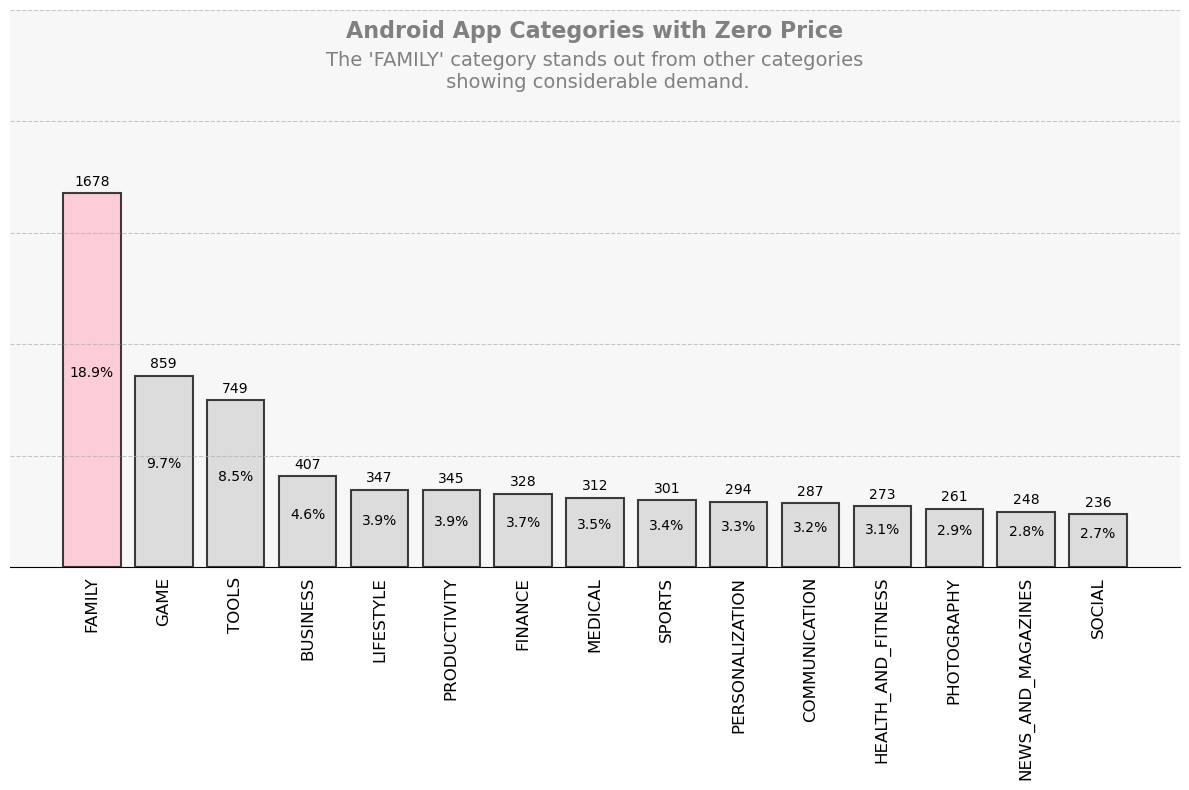

In [195]:
categories = android_final["Category"].value_counts().index[:15]
counts = android_final["Category"].value_counts().values[:15]
percentage = round(android_final["Category"].value_counts(normalize=True) * 100, 1)

# Create a stylish bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(categories, counts, color='lightgray', alpha=0.75, edgecolor='black', linewidth=1.5)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle="", alpha=0.7)
plt.xticks(fontsize=12)  # Customized tick Labels
plt.yticks(range(0, 3000, 500), [], fontsize=12)  # Customized tick Labels and customized y-ticks range
plt.tick_params(bottom=0, left=0)

# Find the category with the highest count
max_count_category = categories[counts.argmax()]

# Highlight the bar for the category with the highest count
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color("pink")
bars[max_count_index].set_edgecolor('black')

# Adding data Labels and percentages inside each bar
for bar, perc in zip(bars, percentage):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 20, "%d" % int(height), ha='center', va='bottom',
             fontsize=10)
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{perc}%', ha='center', va='bottom', fontsize=10)

# Adding a background color
ax = plt.gca()
ax.set_facecolor("#f7f7f7")

# Add chart Title inside chart(Heading Line)
plt.text(0.5, 0.95, 'Android App Categories with Zero Price', horizontalalignment='center',
         transform=plt.gca().transAxes,
         color='grey', fontweight='bold', fontsize=16)

# Add chart Title inside chart(Bottom Line)
plt.text(0.5, 0.86, "The 'FAMILY' category stands out from other categories\n showing considerable demand.",
         horizontalalignment='center', transform=plt.gca().transAxes,
         color='grey', fontsize=14)

# Remove Spines(Boundaries lines removed)
for i in ['top', 'left', 'right']:
    plt.gca().spines[i].set_visible(False)

# Adjust layout to avoid clipping
plt.tight_layout()

plt.show()

In [196]:
android_final[android_final['Category'] == 'FAMILY']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2017,Jewels Crush- Match 3 Puzzle,FAMILY,4.4,14774,19M,"1,000,000+",Free,0,Everyone,Casual;Brain Games,"July 23, 2018",1.9.3901,4.0.3 and up
2018,Coloring & Learn,FAMILY,4.4,12753,51M,"5,000,000+",Free,0,Everyone,Educational;Creativity,"July 17, 2018",1.49,4.0.3 and up
2019,Mahjong,FAMILY,4.5,33983,22M,"5,000,000+",Free,0,Everyone,Puzzle;Brain Games,"August 2, 2018",1.24.3181,4.0.3 and up
2020,Super ABC! Learning games for kids! Preschool ...,FAMILY,4.6,20267,46M,"1,000,000+",Free,0,Everyone,Educational;Education,"July 16, 2018",1.1.6.7,4.1 and up
2021,Toy Pop Cubes,FAMILY,4.5,5761,21M,"1,000,000+",Free,0,Everyone,Casual;Brain Games,"July 4, 2018",1.8.3181,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10821,Poop FR,FAMILY,NaN,6,2.5M,50+,Free,0,Everyone,Entertainment,"May 29, 2018",1.0,4.0.3 and up
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,"5,000+",Free,0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


### The Most Popular Apps by Genre

- For the Google Play market, we actually have data about the of installs, so we should be able to get a clearer picture about genre popularity, However, the install numbers don't seem precise enough. We can see that most values are open-ended(100+,1000+,5000+)

In [197]:
android_final['Installs'].value_counts(normalize = True)*100

1,000,000+        15.739592
100,000+          11.553650
10,000,000+       10.515627
10,000+           10.199707
1,000+             8.405732
100+               6.916394
5,000,000+         6.837414
500,000+           5.573733
50,000+            4.772650
5,000+             4.513145
10+                3.542818
500+               3.249464
50,000,000+        2.290421
100,000,000+       2.121178
50+                1.918086
5+                 0.789800
1+                 0.507729
500,000,000+       0.270789
1,000,000,000+     0.225657
0+                 0.045131
0                  0.011283
Name: Installs, dtype: float64

In [198]:
android_final['Installs_int'] = android_final['Installs'].str.replace('+','').str.replace(',','').astype(int)
android_final['Installs_int']

0           10000
2         5000000
3        50000000
4          100000
5           50000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs_int, Length: 8863, dtype: int32

In [199]:
install_frq = android_final['Installs_int'].value_counts().sort_index()
install_frq = install_frq[install_frq.index > 500]
install_frq

1000           745
5000           400
10000          904
50000          423
100000        1024
500000         494
1000000       1395
5000000        606
10000000       932
50000000       203
100000000      188
500000000       24
1000000000      20
Name: Installs_int, dtype: int64

In [200]:
install_frq_per = round(android_final['Installs_int'].value_counts(normalize = True)*100,2).sort_index()
install_frq_per = install_frq_per[install_frq_per.index > 500]
install_frq_per

1000           8.41
5000           4.51
10000         10.20
50000          4.77
100000        11.55
500000         5.57
1000000       15.74
5000000        6.84
10000000      10.52
50000000       2.29
100000000      2.12
500000000      0.27
1000000000     0.23
Name: Installs_int, dtype: float64

In [201]:
#aplha numeric unit
def alphanumeric_units(value):
    if value >= 1e9:
        return f'{value/ 1e9:.0f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.0f}'

In [202]:
alphanumeric_units(1000000000)

'1B'

In [203]:
install_frq.index = install_frq.index.map(alphanumeric_units)
install_frq

1K       745
5K       400
10K      904
50K      423
100K    1024
500K     494
1M      1395
5M       606
10M      932
50M      203
100M     188
500M      24
1B        20
Name: Installs_int, dtype: int64

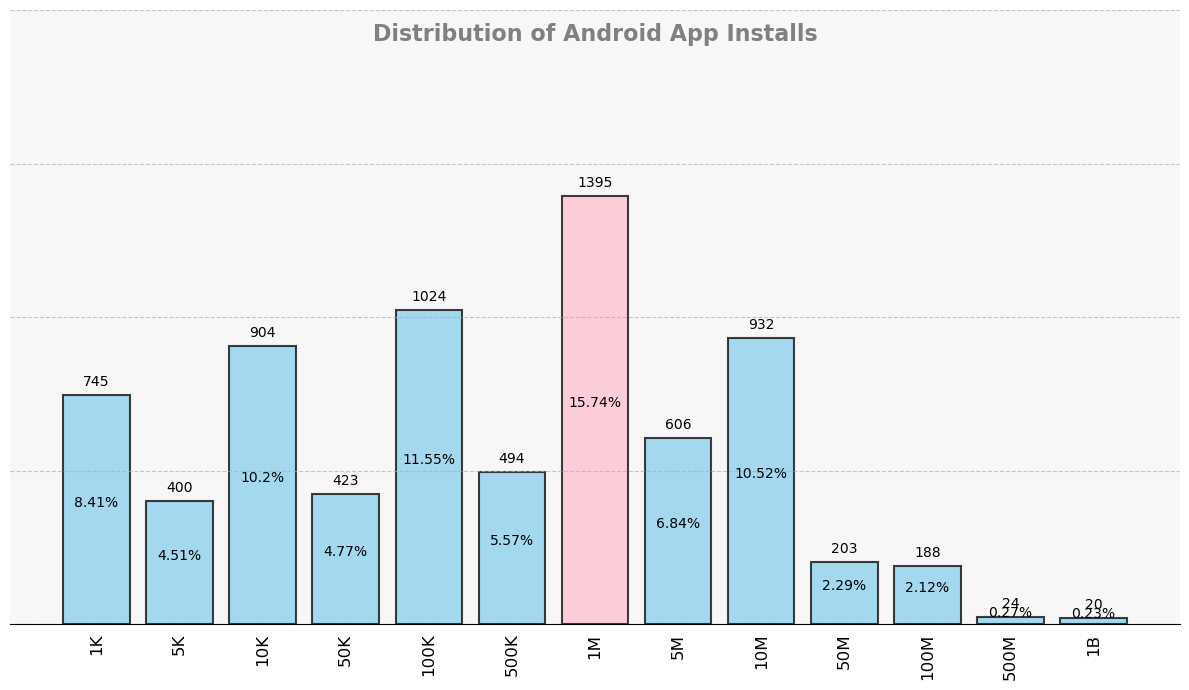

In [204]:
categories = install_frq.index
counts = install_frq.values
percentage1 = install_frq_per.values

# Create a stylish bar chart
plt.figure(figsize=(12, 7))
bars = plt.bar(categories, counts, color='skyblue', alpha=0.75, edgecolor='black', linewidth=1.5)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle="")
plt.xticks(fontsize=12)  # Customized tick Labels
plt.yticks(range(0, 2500, 500), [], fontsize=12)  # Customized tick Labels and customized y-ticks range
plt.tick_params(bottom=0, left=0)

# Find the category with the highest count
max_count_category = categories[counts.argmax()]

# Highlight the bar for the category with the highest count
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color("pink")
bars[max_count_index].set_edgecolor('black')

# Adding data Labels and percentages inside each bar
for bar, perc in zip(bars, percentage1):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 20, "%d" % int(height), ha='center', va='bottom', fontsize=10)
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{perc}%', ha='center', va='bottom', fontsize=10,
             color='black')  # Specify color here

# Adding a background color
ax = plt.gca()
ax.set_facecolor("#f7f7f7")

# Adding CHART TITLE inside the chart
plt.text(0.5, 0.95, 'Distribution of Android App Installs', horizontalalignment="center", fontsize=16, \
         transform=plt.gca().transAxes, color='gray', fontweight='bold')

# Removing spines
for i in ["top", "right", "left"]:
    plt.gca().spines[i].set_visible(False)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()


In [205]:
categories_android = android_final['Category'].unique()
categories_android

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [206]:
pd.pivot_table(android_final, values='Installs_int', index = 'Category', aggfunc = 'mean')

,Installs_int
Category,
ART_AND_DESIGN,1.986335e+06
AUTO_AND_VEHICLES,6.473178e+05
BEAUTY,5.131519e+05
BOOKS_AND_REFERENCE,8.767812e+06
BUSINESS,1.712290e+06
COMICS,8.176573e+05
COMMUNICATION,3.845612e+07
DATING,8.540288e+05
EDUCATION,1.820673e+06


In [207]:
# Display dataframe without scientific notation
pd.options.display.float_format = '{:.0f}'.format

In [208]:
categories_installs = pd.pivot_table(android_final, values='Installs_int', index = 'Category', aggfunc = 'mean')
categories_installs = categories_installs.sort_values(by = 'Installs_int', ascending = False)
categories_installs = categories_installs['Installs_int']
categories_installs

Category
COMMUNICATION         38456119
VIDEO_PLAYERS         24727872
SOCIAL                23253652
PHOTOGRAPHY           17805628
PRODUCTIVITY          16787331
GAME                  15560966
TRAVEL_AND_LOCAL      13984078
ENTERTAINMENT         11640706
TOOLS                 10682301
NEWS_AND_MAGAZINES     9549178
BOOKS_AND_REFERENCE    8767812
SHOPPING               7036877
PERSONALIZATION        5201483
WEATHER                5074486
HEALTH_AND_FITNESS     4188822
MAPS_AND_NAVIGATION    4056942
FAMILY                 3694276
SPORTS                 3638640
ART_AND_DESIGN         1986335
FOOD_AND_DRINK         1924898
EDUCATION              1820673
BUSINESS               1712290
LIFESTYLE              1433676
FINANCE                1387692
HOUSE_AND_HOME         1331541
DATING                  854029
COMICS                  817657
AUTO_AND_VEHICLES       647318
LIBRARIES_AND_DEMO      638504
PARENTING               542604
BEAUTY                  513152
EVENTS                  253542

In [209]:
def alphanum_units(value):
    if value >= 1e9:
        return f'{value/ 1e9:.1f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.1f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.1f}K'
    else:
        return f'{value:.1f}'

In [210]:
categories_installs_units = categories_installs.map(alphanum_units)
categories_installs_units

Category
COMMUNICATION           38.5M
VIDEO_PLAYERS           24.7M
SOCIAL                  23.3M
PHOTOGRAPHY             17.8M
PRODUCTIVITY            16.8M
GAME                    15.6M
TRAVEL_AND_LOCAL        14.0M
ENTERTAINMENT           11.6M
TOOLS                   10.7M
NEWS_AND_MAGAZINES       9.5M
BOOKS_AND_REFERENCE      8.8M
SHOPPING                 7.0M
PERSONALIZATION          5.2M
WEATHER                  5.1M
HEALTH_AND_FITNESS       4.2M
MAPS_AND_NAVIGATION      4.1M
FAMILY                   3.7M
SPORTS                   3.6M
ART_AND_DESIGN           2.0M
FOOD_AND_DRINK           1.9M
EDUCATION                1.8M
BUSINESS                 1.7M
LIFESTYLE                1.4M
FINANCE                  1.4M
HOUSE_AND_HOME           1.3M
DATING                 854.0K
COMICS                 817.7K
AUTO_AND_VEHICLES      647.3K
LIBRARIES_AND_DEMO     638.5K
PARENTING              542.6K
BEAUTY                 513.2K
EVENTS                 253.5K
MEDICAL                120.6K
N

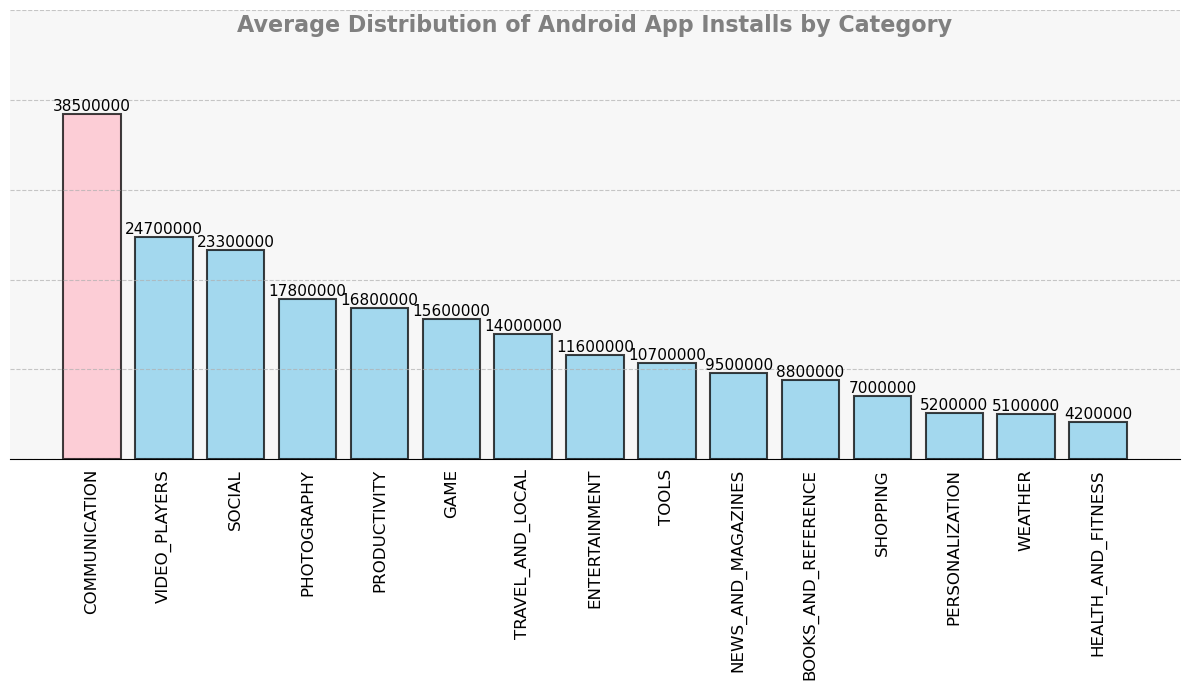

In [211]:
categories = categories_installs.index[:15]
counts = categories_installs.values[:15]

# Convert string units to numerical values
categories_installs_units_values = []
for unit in categories_installs_units.values:
    if 'M' in unit:
        value = float(unit.replace('M', '')) * 1000000  # Convert million to numerical value
        categories_installs_units_values.append(int(value))
    elif 'K' in unit:
        value = float(unit.replace('K', '')) * 1000  # Convert thousand to numerical value
        categories_installs_units_values.append(int(value))
    else:
        categories_installs_units_values.append(int(unit.replace(',', '')))  # Convert other units to integers

# Create a stylish bar chart
plt.figure(figsize=(12, 7))
bars = plt.bar(categories, counts, color='skyblue', alpha=0.75, edgecolor='black', linewidth=1.5)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle="")
plt.xticks(fontsize=12)  # Customized tick Labels
plt.yticks(range(0, 60000000, 10000000), [], fontsize=12)  # Customized tick Labels and customized y-ticks range
plt.tick_params(bottom=0, left=0)

# Find the category with the highest count
max_count_category = categories[counts.argmax()]

# Highlight the bar for the category with the highest count
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color("pink")
bars[max_count_index].set_edgecolor('black')

# Adding data Labels and percentages inside each bar
for bar, units in zip(bars, categories_installs_units_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 25, units, ha='center', va='bottom', fontsize=11)

# Adding a background color
ax = plt.gca()
ax.set_facecolor("#f7f7f7")

# Adding CHART TITLE inside the chart
plt.text(0.5, 0.95, 'Average Distribution of Android App Installs by Category', horizontalalignment="center",
         fontsize=16, transform=plt.gca().transAxes, color='gray', fontweight='bold')

# Removing spines
for i in ["top", "right", "left"]:
    plt.gca().spines[i].set_visible(False)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()


### Observation

- Communication apps emerge as the frontrunners, boasting an impressive 38.5 million installations, closely trailed by Video Players with 24.7 million and Social apps with 23.3 million installs. These categories underscore substantial popularity among Android users, highlighting the significance of communication and media consumption in the mobile app landscape.

### Conclusion

- An examination of the photography category highlights a noteworthy trend favoring the popularity of photo editing and collage-making applications, with numerous apps surpassing the 100 million installs mark. This pattern indicates a robust demand for photo-related functionalities among users. Consequently, there seems to be considerable potential for the creation of a photo generation application in 2024. Such an app, offering quick and free picture and photo generation, could capitalize on the existing user interest in photography apps. By incorporating innovative features, user-friendly design, and delivering high-quality output, this application could set itself apart in the competitive market and attract a substantial user base. Given the success of current photography apps and the evolving preferences of users, investing in the development of a photo generation app appears promising for capitalizing on this lucrative market segment in 2024.